In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(100)
x=np.random.random(100)
epsilon=np.random.uniform(-0.3,0.3,100)
y=np.sin(2*np.pi*x)+epsilon

alpha=np.arange(0, 0.1, 0.01)
np.random.seed(5)
theta=np.random.uniform(-0.5,0.5,4)
h=np.empty_like(y)
error=np.empty(5000)
min_err=100.0
h_init=np.empty_like(y)
h_init=theta[0]*1 + theta[1]*x + theta[2]*np.power(x,2) + theta[3]*np.power(x,3)

# Model Training

In [3]:
for a in alpha:
    for i in range(5000):
        for j in range(x.size):
            h[j]=theta[0]*1 + theta[1]*x[j] + theta[2]*np.power(x[j],2) + theta[3]*np.power(x[j],3)
            theta=theta+a*(y[j]-h[j])*np.array([1, x[j], np.power(x[j],2), np.power(x[j],3)])
        if a==0.03:
            error[i]=np.sum(np.square(h-y))/2
    err=np.sum(np.square(h-y))
    print('Error with learning rate {} is {} '.format(a, err))
    if err<min_err:
        min_err=err
        best_h=h
        best_theta=theta
        best_alpha=a

error in loop 0.0 is 73.56447519724891 
error in loop 0.01 is 9.562054469232352 
error in loop 0.02 is 3.957172871131731 
error in loop 0.03 is 3.2902331120767023 
error in loop 0.04 is 3.3135000045194456 
error in loop 0.05 is 3.3617673853208876 
error in loop 0.06 is 3.409621997732504 
error in loop 0.07 is 3.4575060021506236 
error in loop 0.08 is 3.505500517252877 
error in loop 0.09 is 3.5536050756746214 


In [4]:
print('min_err: ',min_err)
print('best_theta: ',best_theta)
print('best_alpha: ',best_alpha)
error

min_err:  3.2902331120767023
best_theta:  [ -0.0647765   10.96884442 -32.59145249  21.84947491]
best_alpha:  0.03


array([2.0025182 , 2.00240165, 2.00215964, ..., 1.64513431, 1.64512543,
       1.64511656])

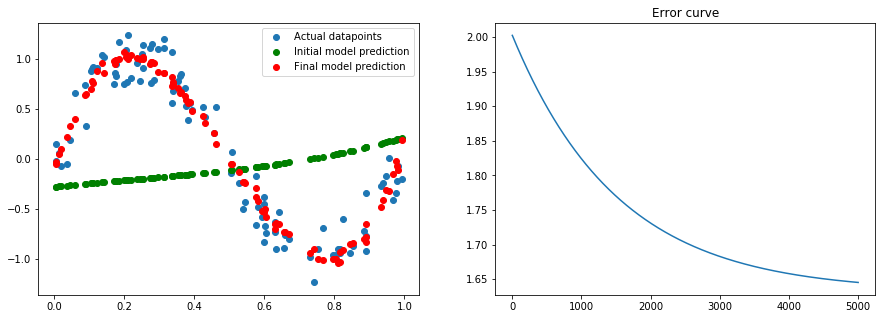

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(x, y, 'o', label='Actual datapoints')
ax1.plot(x, h_init, 'go', label='Initial model prediction')
ax1.plot(x, best_h, 'ro', label='Final model prediction')
ax1.legend()

ax2.plot(error)
ax2.set_title('Error curve')

plt.show()